## Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Importing packages

In [42]:
#Load the libraryss
import pandas as pd #To work with dataset
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Creating dataset

In [128]:
data = pd.read_csv('loan\loan.csv',index_col=False, dtype='unicode')

In [79]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [80]:
data.shape

(39717, 111)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [82]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


<AxesSubplot:>

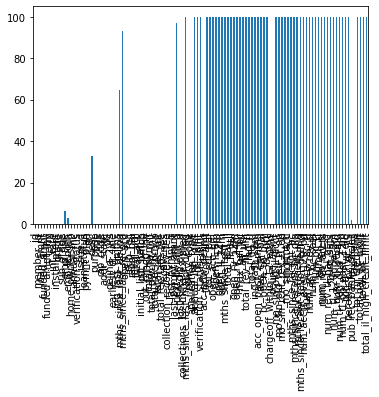

In [83]:
((data.isna().sum()/data.shape[0])*100).plot(kind='bar')

### Data Cleaning
- Need to fix rows and columns
- Need to fix missing values
- Need to standardise values
- Need to fix invalid values
- Need to  filter data

#### 1. Checklist for Fixing Rows
#### 2. Checklist for Fixing Columns
#### 3. Checklist for missing values
#### 4. Checklist for Standardise values
#### 5. Checklist for Fixing invalid values
#### 6. Checklist for Filtering Data

In [84]:
#Check the number of null values in the columns
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [129]:
#Drop the columns, which is gt than 25000 null values
data_NULL = data[data.columns[data.isnull().sum() > 25000]]
data_NULL.shape



(39717, 57)

In [86]:
#Check the shape of the dataframe
data_NULL.head()

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,NaN,Jun-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#lets drop the column from data contains null more than 25000 rows
data = data.drop(data_NULL, axis=1)


In [131]:
data.shape

(39717, 54)

In [96]:
# still processing to find any null after cleaning of columns > 25000
data.columns[data.isnull().any()].tolist()  #data.columns[data.isna().any()].tolist()

[]

In [94]:
#check one coulmn
data['emp_title'][data['emp_title'].isnull()]

0        NaN
2        NaN
8        NaN
30       NaN
42       NaN
        ... 
39700    NaN
39704    NaN
39706    NaN
39714    NaN
39715    NaN
Name: emp_title, Length: 2459, dtype: object

In [95]:
#fill all nan at data set with 0 value.
data.fillna(0,inplace=True)

In [255]:
#data.head(10)

<AxesSubplot:>

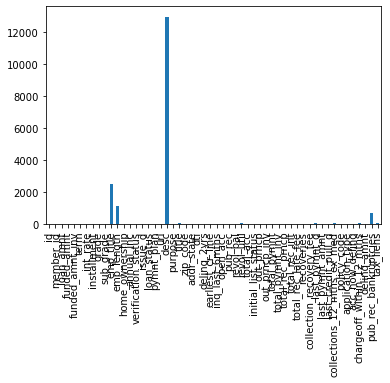

In [102]:
#Check zero values 
(data == 0).sum().plot(kind='bar')

In [132]:
data = data.drop(['desc'], axis=1)

In [133]:
data.shape


(39717, 53)

In [ ]:
# cleaning rows - Remove loan status in current

In [134]:
data_chargeoff = data[data['loan_status'] == 'Charged Off']

In [110]:
data_chargeoff.shape

(5627, 53)

In [135]:
data_fullypaid = data[data['loan_status'] == 'Fully Paid']
data_fullypaid.shape

(32950, 53)

In [ ]:
#below code is copied

## Identify Categorical Columns
Count of no of unique values in the column

In [156]:
# to indetify the unique values in columns to use for categorical
data_chargeoff_unique_count_data = []
for values in data_chargeoff.columns.tolist():
    data_chargeoff_unique_count_data.append({'header': values, 'counts': len(data_chargeoff[values].unique())})

In [157]:
data_chargeoff_unique_count = pd.DataFrame(data_chargeoff_unique_count_data).sort_values('counts',ascending = True)

In [158]:
data_chargeoff_unique_count.head(20)

,header,counts
34,out_prncp_inv,1
50,delinq_amnt,1
16,loan_status,1
48,acc_now_delinq,1
47,application_type,1
32,initial_list_status,1
46,policy_code,1
33,out_prncp,1
17,pymnt_plan,1
52,tax_liens,2


## Creating derived columns

In [256]:
#data_chargeoff.info()

In [269]:
try:
    data.int_rate = data.int_rate.apply(lambda x: x.replace("%","")).astype("float64")
except:
    print ("Processed already!")
    
#data.int_rate
try:
    data.term = data.term.apply(lambda x: x.replace(" months","")).astype("int")
except:
    print ("Processed already!")    
#data.term

try:
    data.emp_length = data.emp_length.apply(lambda x: x.replace("+ years","").replace(" years","").replace(" year",""))
except:
    print ("Processed already!")  
    
data.emp_length

Processed already!
Processed already!
Processed already!


0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [279]:
def clean_emplen(val):
    return int(val.replace("year","").replace("years","").replace("+",""))

In [282]:
data.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [281]:
#data.emp_length = data.emp_length.apply(lambda x: x.replace("+ years","")).astype(str)
data.emp_length = data.emp_length.apply(lambda x: clean_emplen(x))


ValueError: invalid literal for int() with base 10: '10 s'

In [252]:
data = data[-(data['last_pymnt_d'] == "")]
data = data[-data['last_pymnt_d'].isnull()]
data = data[-(data['earliest_cr_line'] == "")]
data.shape

(39717, 55)

In [253]:
#data[data['last_pymnt_d'].isna()]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_year,issue_d_month


In [251]:
#data.to_excel("output.xlsx") 

In [242]:
#data.info()

In [254]:
#data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month
from datetime import datetime
data['issue_d_month']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
data['issue_d_year']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year


#data['last_pymnt_d_month']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['last_pymnt_d_year']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data['earliest_cr_line_month']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['earliest_cr_line_year']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data.head()

In [ ]:
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)

In [30]:





null_columns_dropped_data['emp_length_years'] = null_columns_dropped_data['emp_length'].str.rstrip('years ')
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
null_columns_dropped_data['emp_length_years'][null_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'
del null_columns_dropped_data['emp_length']

In [31]:
null_columns_dropped_data['revol_util_percentage'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
del null_columns_dropped_data['revol_util']

In [32]:
null_columns_dropped_data['issue_d_month'], null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data[
    'issue_d'].str.split('-').str

null_columns_dropped_data['last_credit_pull_d_month'], null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data[
    'last_credit_pull_d'].str.split('-').str

null_columns_dropped_data['last_pymnt_d_month'], null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data[
    'last_pymnt_d'].str.split('-').str

null_columns_dropped_data['earliest_cr_line_month'], null_columns_dropped_data['earliest_cr_line_year'] = null_columns_dropped_data[
    'earliest_cr_line'].str.split('-').str


C:\Users\KHALEEL\AppData\Local\Temp/ipykernel_21804/1341782061.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['issue_d_month'], null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data[
C:\Users\KHALEEL\AppData\Local\Temp/ipykernel_21804/1341782061.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['last_credit_pull_d_month'], null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data[
C:\Users\KHALEEL\AppData\Local\Temp/ipykernel_21804/1341782061.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['last_pymnt_d_month'], null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data[
C:\Users\KHALEEL\AppData\Local\Temp/ipykernel_21804/1341782061.py:10: FutureWarning: Columnar iteration over characters will be deprecated in f

In [33]:
null_columns_dropped_data['issue_d_year'] = '20' + null_columns_dropped_data['issue_d_year']

## Updated column datatype

In [34]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.float)

C:\Users\KHALEEL\AppData\Local\Temp/ipykernel_21804/1057534360.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.float)


ValueError: Columns must be same length as key

In [ ]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(
    null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt']
)*100/null_columns_dropped_data['funded_amnt']

In [ ]:
null_columns_dropped_data['loan_inc_ratio'
                         ] = null_columns_dropped_data.funded_amnt*100/null_columns_dropped_data.annual_inc

In [ ]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.int)

In [ ]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [ ]:
null_columns_dropped_data['annual_inc_lakhs'] = null_columns_dropped_data['annual_inc'] / 1000

In [ ]:
null_columns_dropped_data['annual_inc_lakhs'].describe()

In [ ]:
null_columns_dropped_data.head()

## Count of Categorical and Numeric columns

In [ ]:
numeric_data = null_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_data.select_dtypes(exclude = [np.number, np.object])

string_data = null_columns_dropped_data.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

In [ ]:
## Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = null_columns_dropped_data[null_columns_dropped_data.loan_status !='Current']
null_columns_dropped_data = null_columns_dropped_data.loc[:,null_columns_dropped_data.nunique()!=1]

In [ ]:
## Final dataset for Exploratory Data Analytics
df = null_columns_dropped_data

In [ ]:
df["loan_status"].value_counts()

## Univariate Analysis 

In [ ]:
df["loan_status"].value_counts()

In [ ]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

**Inference:** The loan amount varies from 0 to 35,000 having mean of 10,000

In [ ]:
sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

In [ ]:
df["loan_status"].value_counts()

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 14% of loan are having status as defaulters.
3. We have a class imbalance here.

In [ ]:
sns.countplot(x='grade', data=df)
plt.show()

**Inference:** Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

In [ ]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

**Inference:** Majority of employees applying for the loan have more than 10 years of experience

In [ ]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

In [ ]:
sns.distplot(df['funded_amnt'])
plt.show()

**Inference:** Funded amount is left skewed. Most of the loan amount given is 5 lakhs

In [ ]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference:** There are only two applicants having annual income of more than 30 lakhs

In [ ]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference:** Majority of loan applicants have income less than 5 lakhs

In [ ]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

In [ ]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

In [ ]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

## Segmented Univariate Analysis

In [ ]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

**Inference:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

In [ ]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

In [ ]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference:** Tenure of 36 months have have high chances to be defaulters

In [ ]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

## Bivariate Plots

In [ ]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

**Inference:** Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

In [ ]:
del numeric_data['out_prncp']
del numeric_data['out_prncp_inv']

In [ ]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

In [ ]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**Inference:** Applicants from the state CA are having high probability to be default

In [ ]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Inference:** Loan Applicants have been increasing exponentially from year 2007 to 2011

In [ ]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [ ]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

In [ ]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [ ]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

In [ ]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()